# Province Gender Available Twitter Data - Metadata Statistics

In [1]:
import gzip
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pcodes = {"1": "Adana", "2": "Adıyaman", "3": "Afyonkarahisar", "4": "Ağrı", "68": "Aksaray", "5": "Amasya", "6": "Ankara",
          "7": "Antalya", "75": "Ardahan", "8": "Artvin", "9": "Aydın", "10": "Balıkesir", "74": "Bartın", "72": "Batman",
          "69": "Bayburt", "11": "Bilecik", "12": "Bingöl", "13": "Bitlis", "14": "Bolu", "15": "Burdur", "16": "Bursa",
          "17": "Çanakkale", "18": "Çankırı", "19": "Çorum", "20": "Denizli", "21": "Diyarbakır", "81": "Düzce", "22": "Edirne",
          "23": "Elazığ", "24": "Erzincan", "25": "Erzurum", "26": "Eskişehir", "27": "Gaziantep", "28": "Giresun",
          "29": "Gümüşhane", "30": "Hakkâri", "31": "Hatay", "76": "Iğdır", "32": "Isparta", "34": "İstanbul", "35": "İzmir",
          "46": "Kahramanmaraş", "78": "Karabük", "70": "Karaman", "36": "Kars", "37": "Kastamonu", "38": "Kayseri",
          "71": "Kırıkkale", "39": "Kırklareli", "40": "Kırşehir", "79": "Kilis", "41": "Kocaeli", "42": "Konya",
          "43": "Kütahya", "44": "Malatya", "45": "Manisa", "47": "Mardin", "33": "Mersin", "48": "Muğla", "49": "Muş",
          "50": "Nevşehir", "51": "Niğde", "52": "Ordu", "80": "Osmaniye", "53": "Rize", "54": "Sakarya", "55": "Samsun",
          "56": "Siirt", "57": "Sinop", "58": "Sivas", "63": "Şanlıurfa", "73": "Şırnak", "59": "Tekirdağ", "60": "Tokat",
          "61": "Trabzon", "62": "Tunceli", "64": "Uşak", "65": "Van", "77": "Yalova", "66": "Yozgat", "67": "Zonguldak"}

## Read Data from Gzip

In [3]:
with gzip.open("province_gender_available_metadata_added-220603_combined.txt.gz", "rb") as f:
    users = f.readlines()
    
for i in range(len(users)):
    users[i] = json.loads(users[i].decode("utf-8"))

In [4]:
print(f"Total User Count: {len(users)}")

Total User Count: 491783


## Create DataFrame

In [5]:
df = pd.DataFrame(users)

In [6]:
df.shape

(491783, 15)

In [7]:
df.head(3)

,location,description,name,screen_name,id_str,created_at,province_codes,genders,following,followers,tweets,followers_count,following_count,pp,downloaded
0,pakistan💖🇵🇰,student of journalism. bureaucracy is my passi...,muhammad awais,awaislail99,1265599140303720449,Wed May 27 11:02:16 +0000 2020,"[{'source': 'description', 'pcode': 61}, {'sou...","[{'source': 'name', 'gender': 'male'}]","[1456561767685963777, 382129509, 1249009506769...","[1221216064333340672, 1527286062187696129, 128...","[{'twt_id_str': '1525724573114712064', 'twt_tx...",192,341,1455794897244413952/UOZMBVWm_normal.jpg,220529
1,"bursa, türkiye",ya\nya\nya,🥶🥶.,yucelavass,1224993604696932352,Wed Feb 05 09:50:27 +0000 2020,"[{'source': 'location', 'pcode': 16}]","[{'source': 'screen_name', 'gender': 'male'}]",[],[],[],,,,220529
2,,yeni seçmen komisyonu - üsküdar gençlik kulübü...,mehmet can özerk,mehmet_ozerk00,1370077385677283329,Thu Mar 11 18:21:26 +0000 2021,"[{'source': 'description', 'pcode': 34}, {'sou...","[{'source': 'name', 'gender': 'male'}, {'sourc...","[1212478549438779394, 248829166, 1261344501286...","[1212478549438779394, 3909471135, 948222397, 1...","[{'ref_twt_id_str': '1519741160402599938', 're...",182,78,1433135366584799235/oFBU0Ohs_normal.jpg,220529


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491783 entries, 0 to 491782
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   location         491783 non-null  object
 1   description      491783 non-null  object
 2   name             491783 non-null  object
 3   screen_name      491783 non-null  object
 4   id_str           491783 non-null  object
 5   created_at       491783 non-null  object
 6   province_codes   491783 non-null  object
 7   genders          491783 non-null  object
 8   following        491783 non-null  object
 9   followers        491783 non-null  object
 10  tweets           491783 non-null  object
 11  followers_count  491783 non-null  object
 12  following_count  491783 non-null  object
 13  pp               491783 non-null  object
 14  downloaded       491783 non-null  object
dtypes: object(15)
memory usage: 56.3+ MB


## Download Counts

In [9]:
download_counts = pd.DataFrame(df["downloaded"].value_counts().sort_index()).reset_index().rename({"index": "date", "downloaded":"download_count"}, axis=1)
download_counts["date"] = download_counts["date"].apply(lambda x: x[4:] + "/" + x[2:4] + "/" + "20" + x[:2])
download_counts = download_counts.set_index("date")
download_counts

,download_count
date,
18/03/2022,50146
19/03/2022,303
20/03/2022,202
21/03/2022,221
22/03/2022,750
23/03/2022,1440
24/03/2022,1430
25/03/2022,1440
26/03/2022,1440


## User Statistics

In [10]:
province_codes_sources = []

for item in df["province_codes"]:
    province_codes_sources.append(item[0]['source'])
    
print("Province Code Source Counts:")
display(pd.Series(province_codes_sources).value_counts())

Province Code Source Counts:


location       354753
description    137023
screen_name         7
dtype: int64

In [11]:
gender_sources = []

for item in df["genders"]:
    gender_sources.append(item[0]['source'])
    
print("Gender Source Counts:")
display(pd.Series(gender_sources).value_counts())

Gender Source Counts:


name           465533
screen_name     25970
description       280
dtype: int64

### User Statistics - Location

In [12]:
sehir_counts = df["province_codes"].apply(lambda x: pcodes[str(x[0]["pcode"])]).value_counts()
sehir_counts = pd.DataFrame(sehir_counts).reset_index().rename({"index": "sehir", "province_codes":"user_count"}, axis=1)

In [13]:
sehir_counts[:60]

,sehir,user_count
0,İstanbul,124665
1,İzmir,36685
2,Ankara,32253
3,Trabzon,19367
4,Bursa,19358
5,Antalya,17902
6,Mersin,16962
7,Adana,13041
8,Kocaeli,10642
9,Konya,8726


In [14]:
sehir_counts[60:]

,sehir,user_count
60,Kırıkkale,1139
61,Kars,1127
62,Bartın,1117
63,Nevşehir,1116
64,Muş,1097
65,Sinop,1045
66,Erzincan,989
67,Bitlis,952
68,Karaman,935
69,Burdur,925


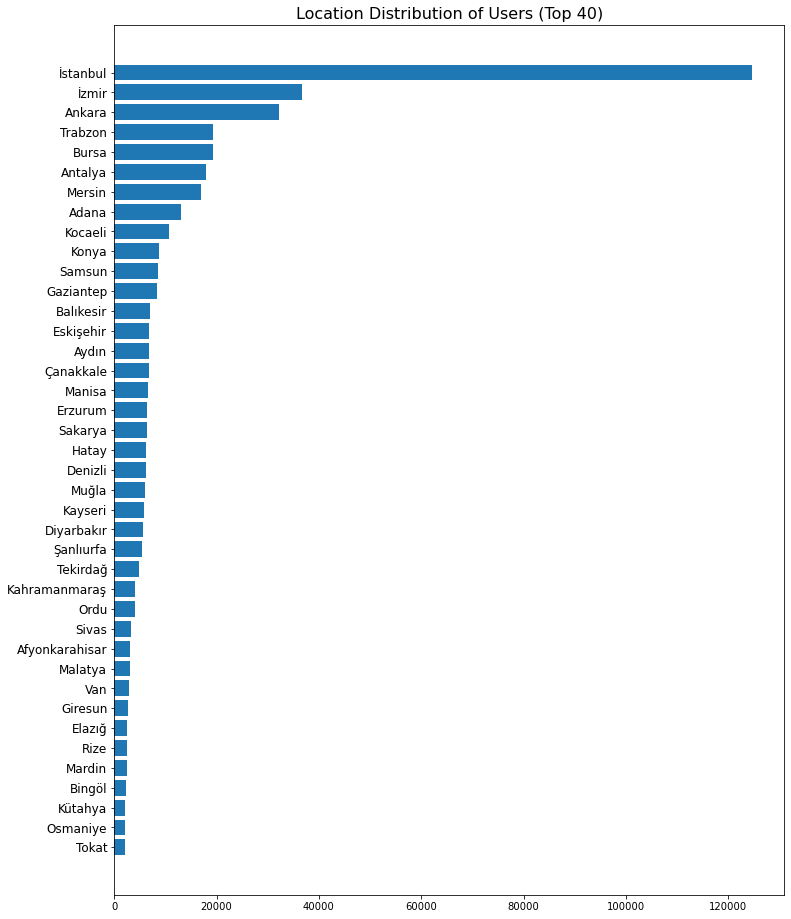

In [15]:
plt.figure(figsize=(12, 16))

plt.barh(sehir_counts["sehir"][:40], sehir_counts["user_count"][:40])
plt.title("Location Distribution of Users (Top 40)", fontsize=16)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()
plt.show()

### User Statistics - Gender

In [16]:
gender_counts = pd.DataFrame(df["genders"].apply(lambda x: x[0]["gender"]).value_counts()).reset_index().rename({"index": "gender", "genders": "count"}, axis=1)
gender_counts = pd.concat([gender_counts, pd.Series([f"{x:.2f}%" for x in gender_counts["count"] / df.shape[0] * 100], name="percentages")], axis=1)
gender_counts = gender_counts.set_index("gender")
gender_counts

,count,percentages
gender,,
male,329982,67.10%
female,161801,32.90%


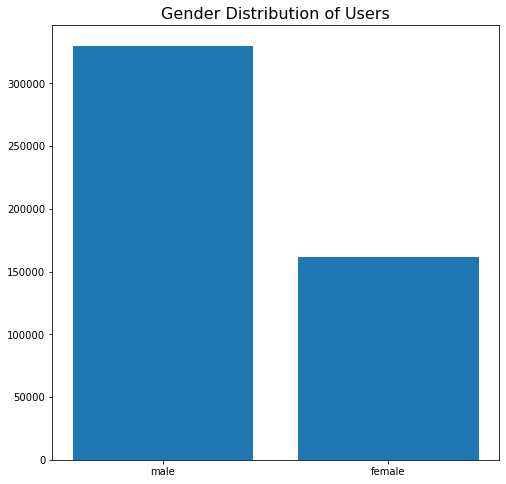

In [17]:
gender_counts = gender_counts.reset_index()
plt.figure(figsize=(8, 8))

plt.bar(gender_counts["gender"], gender_counts["count"])
plt.title("Gender Distribution of Users", fontsize=16)
plt.show()

## Tweet Statistics

In [18]:
all_tweet_ids = []

for tweet_list in df["tweets"]:
    for tweet in tweet_list:
        if tweet["type"] == "original":
            all_tweet_ids.append(tweet["twt_id_str"])
        elif tweet["type"] == "reply":
            all_tweet_ids.append(tweet["twt_id_str"])
            all_tweet_ids.append(tweet["ref_twt_id_str"])
        elif tweet["type"] == "retweet":
            all_tweet_ids.append(tweet["ref_twt_id_str"])
        elif tweet["type"] == "quote":
            all_tweet_ids.append(tweet["twt_id_str"])
            all_tweet_ids.append(tweet["ref_twt_id_str"])
        elif tweet["type"] == "fav":
            all_tweet_ids.append(tweet["ref_twt_id_str"])
        else:
            print(tweet["type"])

In [19]:
print(f"Total number of tweets: {len(all_tweet_ids)}")
print(f"Number of unique tweets: {len(set(all_tweet_ids))}")

Total number of tweets: 18036857
Number of unique tweets: 13017719


### Tweet Statistics - Tweet Counts by Tweet Type

In [20]:
original_count = 0
reply_count = 0
retweet_count = 0
quote_count = 0
fav_count = 0

for i in range(len(df)):
    for tweet in df.loc[i, "tweets"]:
        if tweet["type"] == "original":
            original_count += 1
        elif tweet["type"] == "reply":
            reply_count += 1
        elif tweet["type"] == "retweet":
            retweet_count += 1
        elif tweet["type"] == "quote":
            quote_count += 1
        elif tweet["type"] == "fav":
            fav_count += 1

In [21]:
tweets = []

for tweet_list in df["tweets"]:
    for tweet in tweet_list:
        tweets.append(tweet)

In [22]:
tweet_counts_by_type = pd.concat([pd.Series(["original", "reply", "retweet", "quote", "fav", "total"],
                                            name="tweet_type"),
                                  pd.Series([original_count, reply_count, retweet_count, quote_count, fav_count, len(tweets)],
                                            name="count")],
                                 axis=1)
tweet_counts_by_type = pd.concat([tweet_counts_by_type, pd.Series([f"{x:.2f}%" for x in tweet_counts_by_type["count"] / len(tweets) * 100], name="percentages")], axis=1)
tweet_counts_by_type = tweet_counts_by_type.set_index("tweet_type")
tweet_counts_by_type

,count,percentages
tweet_type,,
original,1176664,6.76%
reply,587280,3.37%
retweet,561620,3.23%
quote,36598,0.21%
fav,15050817,86.43%
total,17412979,100.00%


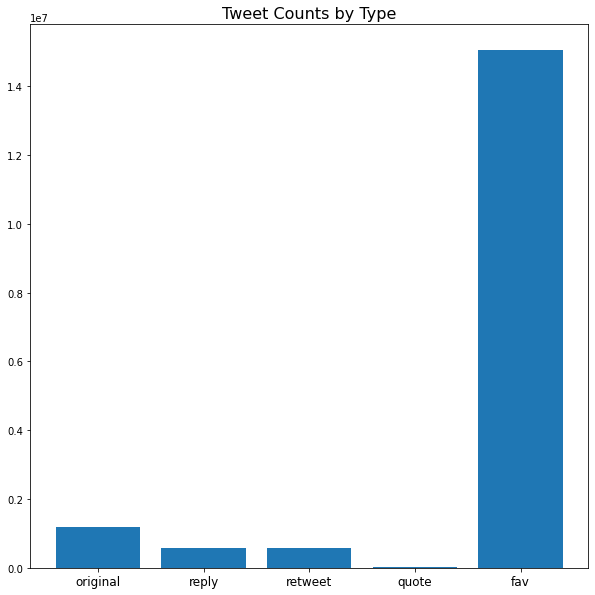

In [23]:
tweet_counts_by_type = tweet_counts_by_type.reset_index()
tweet_counts_by_type = tweet_counts_by_type.drop(5)

plt.figure(figsize=(10, 10))

plt.bar(tweet_counts_by_type["tweet_type"], tweet_counts_by_type["count"])
plt.title("Tweet Counts by Type", fontsize=16)
plt.xticks(fontsize=12)
plt.show()

### Tweet Statistics - Tweet Counts by Year

In [24]:
tweet_years = []

for tweet_list in df["tweets"]:
    for tweet in tweet_list:
        if "-" in tweet["twt_date"]:
            tweet_years.append(tweet["twt_date"][:4])
        else:
            tweet_years.append("20" + tweet["twt_date"][:2])

In [25]:
yearly_tweet_counts = pd.DataFrame(pd.Series(tweet_years).value_counts().sort_index()).reset_index().rename({"index":"year", 0:"count"}, axis=1)
yearly_tweet_counts = pd.concat([yearly_tweet_counts, pd.Series([f"{x:.3f}%" for x in yearly_tweet_counts["count"] / yearly_tweet_counts["count"].sum() * 100], name="percentages")], axis=1)
yearly_tweet_counts = yearly_tweet_counts.set_index("year")
yearly_tweet_counts

,count,percentages
year,,
2006,180,0.001%
2007,23,0.000%
2008,100,0.001%
2009,479,0.003%
2010,2525,0.015%
2011,20864,0.120%
2012,60956,0.350%
2013,232015,1.332%
2014,574199,3.298%


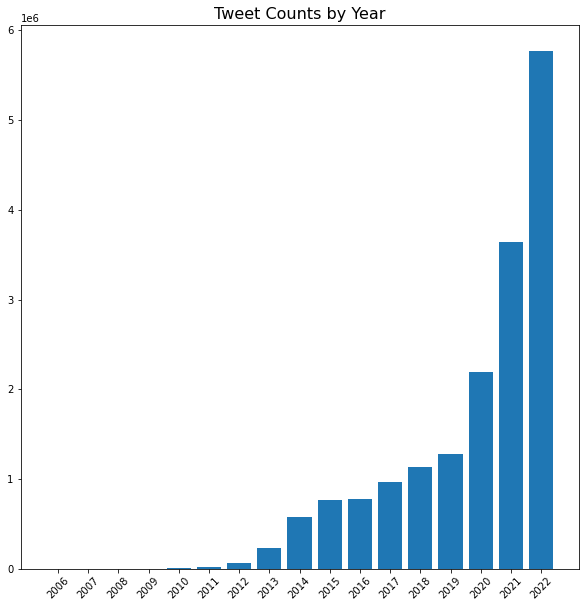

In [26]:
yearly_tweet_counts = yearly_tweet_counts.reset_index()

plt.figure(figsize=(10, 10))

plt.bar(yearly_tweet_counts["year"], yearly_tweet_counts["count"])
plt.xticks(rotation=45)
plt.title("Tweet Counts by Year", fontsize=16)
plt.show()

### Metadata Statistics

In [27]:
print(f"Unique user count: {df['id_str'].nunique()}")

Unique user count: 491783


In [28]:
no_tweet_users_count = 0

for i in range(len(df)):
    if len(df.loc[i, "tweets"]) == 0:
        no_tweet_users_count += 1
        
print(f"Count of users with no tweet: {no_tweet_users_count}")

Count of users with no tweet: 120754


In [29]:
no_tweet_no_fol_count = 0

for i in range(len(df)):
    if len(df.loc[i, "tweets"]) == 0 and df.loc[i, "followers_count"] == "":
        no_tweet_no_fol_count += 1
        
print(f"Count of users with no tweet no followers_count: {no_tweet_no_fol_count}")

Count of users with no tweet no followers_count: 5634


In [30]:
no_tweet_no_fol_count_no_pp = 0

for i in range(len(df)):
    if len(df.loc[i, "tweets"]) == 0 and df.loc[i, "followers_count"] == "" and df.loc[i, "pp"] == "":
        no_tweet_no_fol_count_no_pp += 1
        
print(f"Count of users with no tweet no followers_count no pp: {no_tweet_no_fol_count_no_pp}")

Count of users with no tweet no followers_count no pp: 5624
